Group Members:
Tomson George (C0857730)
Jaskaran Singh Moti (C0860026)
Praveen Mahaulpatha (C0860583)
R. B. C. M. W. Thulana Vimukthi Abeywardana (C0861333)


# 1. Loading and understanding dataset

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt, mpld3

from PIL import Image
import json


#Loading dataset
dataset = pd.read_csv("data.csv")

In [2]:
#First five rows of the dataset
dataset.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#All the columns present in the dataset
dataset.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
#Unique values present across categorical columns
df = dataset.select_dtypes(exclude=["number"])
col = df.columns
for c in col:
    print(c)
    print(df[f"{c}"].unique())

Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti' '62

In [5]:
#Shape of the dataset
dataset.shape

(12000, 16)

In [6]:
#Basic information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               12000 non-null  object 
 1   Model              12000 non-null  object 
 2   Year               12000 non-null  int64  
 3   Engine Fuel Type   11997 non-null  object 
 4   Engine HP          11931 non-null  float64
 5   Engine Cylinders   11970 non-null  float64
 6   Transmission Type  12000 non-null  object 
 7   Driven_Wheels      12000 non-null  object 
 8   Number of Doors    11994 non-null  float64
 9   Market Category    8258 non-null   object 
 10  Vehicle Size       12000 non-null  object 
 11  Vehicle Style      12000 non-null  object 
 12  highway MPG        12000 non-null  int64  
 13  city mpg           12000 non-null  int64  
 14  Popularity         12000 non-null  int64  
 15  MSRP               12000 non-null  int64  
dtypes: float64(3), int64(5

Let's take a look at the relationship between the features.

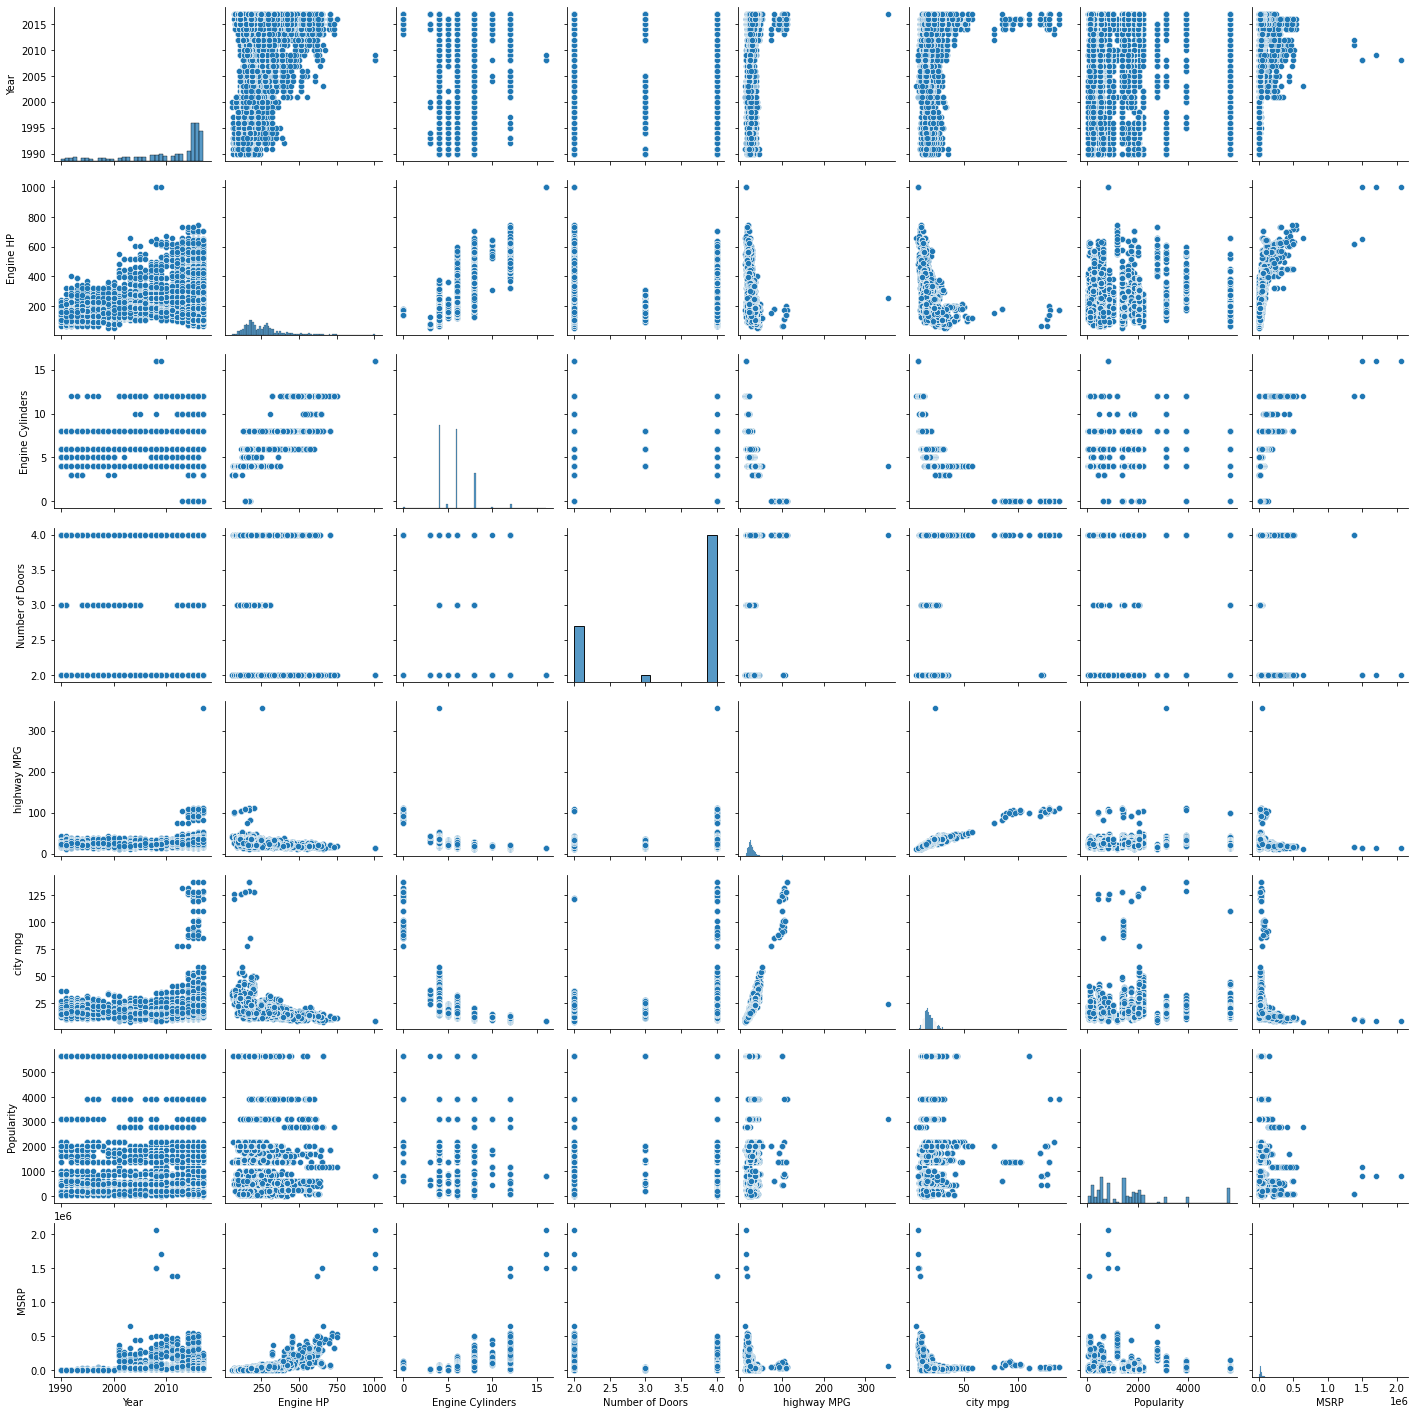

In [7]:
on = sns.pairplot(dataset.select_dtypes(include="number"))
plt.savefig("Saved data/Images/Scatter plots/jpg/preprocessing_pairplot.jpg")
plt.savefig("Saved data/Images/Scatter plots/png/preprocessing_pairplot.png")
plt.show()

#Show image in browser by uncommenting next line
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Scatter plots/preprocessing_pairplot.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Scatter plots/preprocessing_pairplot.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Scatter plots/jpg/preprocessing_pairplot.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Scatter plots/preprocessing_pairplot.txt", "w") as file:
    json.dump(json_data, file)

In [8]:
x = dataset.corr()
x[abs(x) >.6]

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,NaN,1.000000,0.779277,NaN,NaN,NaN,NaN,0.662145
Engine Cylinders,NaN,0.779277,1.000000,NaN,-0.621844,-0.600738,NaN,NaN
Number of Doors,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
highway MPG,NaN,NaN,-0.621844,NaN,1.000000,0.886471,NaN,NaN
city mpg,NaN,NaN,-0.600738,NaN,0.886471,1.000000,NaN,NaN
Popularity,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
MSRP,NaN,0.662145,NaN,NaN,NaN,NaN,NaN,1.000000


We can see a liner relationship between,
1. Engine Cylinder and Engine HP (Positive colinear relationship)
2. Highway MPG and Engine Cylinder (negative colinear relationship)
3. City mpg and Engine Cylinder (negative colinear relationship)
4. City mpg and highway MPG (Positive colinear relationship)
5. MSRP and Engine HP (Positive colinear relationship)

# 2. Zeros, Missing values and Null values Handling

In [9]:
#check for the presence of value zero
# dataset.isin([0]).sum()
(dataset==0).sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP             0
Engine Cylinders     56
Transmission Type     0
Driven_Wheels         0
Number of Doors       0
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

From above, it is clear that column Engine Cylinders contains value Zero. But its a valid value for that column, because electric motors have no cylinders.

In [10]:
dataset[dataset["Engine Cylinders"] == 0]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1680,Mercedes-Benz,B-Class Electric Drive,2015,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1681,Mercedes-Benz,B-Class Electric Drive,2016,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,41450
1682,Mercedes-Benz,B-Class Electric Drive,2017,electric,177.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,"Hatchback,Luxury",Compact,4dr Hatchback,82,85,617,39900
4705,Honda,Fit EV,2013,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4706,Honda,Fit EV,2014,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,105,132,2202,36625
4785,Ford,Focus,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170
4789,Ford,Focus,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,99,110,5657,29170


In [11]:
#It is evident that there are some missing values.
#Calculating the count of missing values
dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Missing or null values are present at Engine Fuel Type, Engine HP, Engine Cylinders and Market Category. Before taking any actions we need to justify weather the mising alues are justifiable or not.

Since the number of missing values in "Engine Fuel Type" and "Number of Doors" are missing at random, we can delete the corresponding rows where any of their values is equal to zero.

In [12]:
#Removing rows where "Engine Fuel Type" and "number of doors"is missing or null
dataset.dropna(how="any", subset=["Engine Fuel Type", "Number of Doors"], inplace=True)
dataset.shape

(11991, 16)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11991 non-null  object 
 1   Model              11991 non-null  object 
 2   Year               11991 non-null  int64  
 3   Engine Fuel Type   11991 non-null  object 
 4   Engine HP          11927 non-null  float64
 5   Engine Cylinders   11961 non-null  float64
 6   Transmission Type  11991 non-null  object 
 7   Driven_Wheels      11991 non-null  object 
 8   Number of Doors    11991 non-null  float64
 9   Market Category    8252 non-null   object 
 10  Vehicle Size       11991 non-null  object 
 11  Vehicle Style      11991 non-null  object 
 12  highway MPG        11991 non-null  int64  
 13  city mpg           11991 non-null  int64  
 14  Popularity         11991 non-null  int64  
 15  MSRP               11991 non-null  int64  
dtypes: float64(3), int64(5

In [14]:
#Taking unique values of columns "Engine Fuel Type"
dataset["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

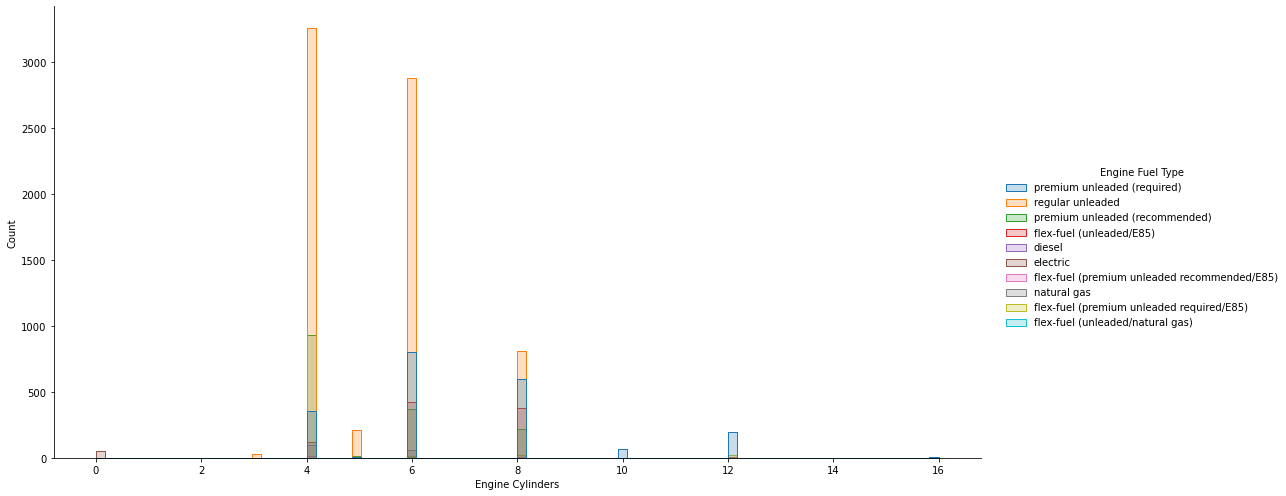

In [15]:
on = sns.displot(dataset, x="Engine Cylinders", hue="Engine Fuel Type",height=7, aspect=2, element = "step")
plt.savefig("Saved data/Images/Bar graphs/jpg/distri_plot_enginetype_cylinder.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/distri_plot_enginetype_cylinder.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Bar graphs/distri_plot_enginetype_cylinder.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Bar graphs/distri_plot_enginetype_cylinder.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/distri_plot_enginetype_cylinder.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/distri_plot_enginetype_cylinder.txt", "w") as file:
    json.dump(json_data, file)

We can see that some vechicles are electric. Hence the feature Engine Cyinders is not applcable to those vehicles. Therefore missing values in Engine Cylinder columns is of the type Missing Not At Random (MNAR). Hence its not a good approach to delete the corresponding rows, but can be filled with value zero.

In [16]:
#Filling missing values of Engine cylinder column with value zero where fuel type is electric
for index, rows in dataset.iterrows():
    if rows["Engine Fuel Type"]=="electric":
        dataset.at[index,"Engine Cylinders"] = 0

dataset["Engine Cylinders"].isnull().sum()

20

Now we will drop the rest of the rows where the values of Engine cylnders is not given.

In [17]:
#Droping rows where Engine Cylinders is null
dataset.dropna(how="any", subset=["Engine Cylinders"], inplace = True)

dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP              64
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3739
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

For the feature "Engine HP", we can impute the missing values. In order to do that, we need to find the feature which it is most related to.

In [18]:
dataset.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.352836,-0.042884,0.254835,0.261742,0.199488,0.069749,0.228543
Engine HP,0.352836,1.000000,0.778395,-0.103991,-0.405463,-0.438706,0.037117,0.661722
Engine Cylinders,-0.042884,0.778395,1.000000,-0.140241,-0.622180,-0.593788,0.041820,0.530566
Number of Doors,0.254835,-0.103991,-0.140241,1.000000,0.116205,0.119618,-0.054188,-0.127079
highway MPG,0.261742,-0.405463,-0.622180,0.116205,1.000000,0.882746,-0.020968,-0.164831
city mpg,0.199488,-0.438706,-0.593788,0.119618,0.882746,1.000000,-0.003840,-0.162474
Popularity,0.069749,0.037117,0.041820,-0.054188,-0.020968,-0.003840,1.000000,-0.049737
MSRP,0.228543,0.661722,0.530566,-0.127079,-0.164831,-0.162474,-0.049737,1.000000


It is evident that feature "Engine HP" has a linear relationship with column "Engine Cylinders".

 We will use KNN Imputer. We will use one hot encoder in order to convert the string data of "Engine Fuel Type" to numbers.

In [19]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
imputer = KNNImputer(n_neighbors=11)

cols = ["Engine Fuel Type","Engine HP","Engine Cylinders", "Year"]
x = dataset[cols]
enc_col = pd.get_dummies(x, prefix = ['Encoded'])
enc_col


,Engine HP,Engine Cylinders,Year,Encoded_diesel,Encoded_electric,Encoded_flex-fuel (premium unleaded recommended/E85),Encoded_flex-fuel (premium unleaded required/E85),Encoded_flex-fuel (unleaded/E85),Encoded_flex-fuel (unleaded/natural gas),Encoded_natural gas,Encoded_premium unleaded (recommended),Encoded_premium unleaded (required),Encoded_regular unleaded
0,335.0,6.0,2011,0,0,0,0,0,0,0,0,1,0
1,300.0,6.0,2011,0,0,0,0,0,0,0,0,1,0
2,300.0,6.0,2011,0,0,0,0,0,0,0,0,1,0
3,230.0,6.0,2011,0,0,0,0,0,0,0,0,1,0
4,230.0,6.0,2011,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,184.0,4.0,2017,0,0,0,0,1,0,0,0,0,0
11996,184.0,4.0,2017,0,0,0,0,1,0,0,0,0,0
11997,295.0,6.0,2017,0,0,0,0,1,0,0,0,0,0
11998,184.0,4.0,2017,0,0,0,0,1,0,0,0,0,0


KNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. We will use Scikit-Learn’s StandardScalar which will scale our variables to centered zero mean with the standard deviation of 1.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
t_enc_col = scaler.fit_transform(enc_col)

In [21]:
d = pd.DataFrame(t_enc_col, columns=enc_col.columns)
d

,Engine HP,Engine Cylinders,Year,Encoded_diesel,Encoded_electric,Encoded_flex-fuel (premium unleaded recommended/E85),Encoded_flex-fuel (premium unleaded required/E85),Encoded_flex-fuel (unleaded/E85),Encoded_flex-fuel (unleaded/natural gas),Encoded_natural gas,Encoded_premium unleaded (recommended),Encoded_premium unleaded (required),Encoded_regular unleaded
0,0.787030,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
1,0.465841,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
2,0.465841,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
3,-0.176536,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
4,-0.176536,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11967,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11968,0.419957,0.211845,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11969,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606


Now, we will impute the dataset

In [22]:
#Imputing
da = imputer.fit_transform(d)
y = pd.DataFrame(da, columns=enc_col.columns)
y

,Engine HP,Engine Cylinders,Year,Encoded_diesel,Encoded_electric,Encoded_flex-fuel (premium unleaded recommended/E85),Encoded_flex-fuel (premium unleaded required/E85),Encoded_flex-fuel (unleaded/E85),Encoded_flex-fuel (unleaded/natural gas),Encoded_natural gas,Encoded_premium unleaded (recommended),Encoded_premium unleaded (required),Encoded_regular unleaded
0,0.787030,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
1,0.465841,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
2,0.465841,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
3,-0.176536,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
4,-0.176536,0.211845,0.082724,-0.114158,-0.071566,-0.046655,-0.067315,-0.288531,-0.022393,-0.012927,-0.383519,2.221498,-1.227606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11967,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11968,0.419957,0.211845,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606
11969,-0.598670,-0.912518,0.870861,-0.114158,-0.071566,-0.046655,-0.067315,3.465827,-0.022393,-0.012927,-0.383519,-0.450147,-1.227606


In [23]:
#Inversing normalisation to get the original values
dfy = pd.DataFrame(scaler.inverse_transform(da), columns=enc_col.columns)
dfy

,Engine HP,Engine Cylinders,Year,Encoded_diesel,Encoded_electric,Encoded_flex-fuel (premium unleaded recommended/E85),Encoded_flex-fuel (premium unleaded required/E85),Encoded_flex-fuel (unleaded/E85),Encoded_flex-fuel (unleaded/natural gas),Encoded_natural gas,Encoded_premium unleaded (recommended),Encoded_premium unleaded (required),Encoded_regular unleaded
0,335.0,6.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,300.0,6.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,300.0,6.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,230.0,6.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,230.0,6.0,2011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11966,184.0,4.0,2017.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11967,184.0,4.0,2017.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11968,295.0,6.0,2017.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11969,184.0,4.0,2017.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Substituting "Engine HP" column
dataset[["Engine HP"]] = dfy[["Engine HP"]].values

dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3739
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [25]:
dataset.shape

(11971, 16)

Considerable number of values are missing for the column "Market Category". Droping the rows is not a practical approach here. Hence we can impute the values in missing rows. In order to impute, first we need to find if that row has any linear relationship with any of the columns so as to choose appropriate method.

We will make a copyof the dataset first

In [26]:
df = dataset.copy()

Therefor it is best to replace missing values with the label 'missing'.

In [27]:
#Replacing missing values in "Maket Category" with label missing
dataset["Market Category"].fillna("Missing",inplace=True)

dataset.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [28]:
dataset.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Thus we have now dealt with all the missing values.

# 3. Check for duplicate data and removal

We will check for the presence of duplicate rows using duplicate function.

In [29]:
#Checking duplicate rows
dataset[dataset.duplicated()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490
11996,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,25690
11997,Chrysler,200,2017,flex-fuel (unleaded/E85),295.0,6.0,AUTOMATIC,all wheel drive,4.0,"Flex Fuel,Performance",Midsize,Sedan,28,18,1013,30900
11998,Chrysler,200,2017,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,27795


There are total of 801 duplicate rows in the data. Let's move forwards by removing these duplicate values.

In [30]:
#Shape before removing duplicates
dataset.shape

(11971, 16)

In [31]:
#Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

dataset.shape

(11170, 16)

# 4. Measure of central tendency and dispersion

The 'describe()' function alone only prints the statistics for the quantitative or numerical variable.

In [32]:
#description of the dataset
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11170.000000,11170.00000,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,1.117000e+04
mean,2010.719517,252.95549,5.662757,3.453536,26.584870,19.705282,1560.480125,4.191783e+04
std,7.230509,110.12055,1.799927,0.873214,8.837902,9.036678,1446.800214,6.155367e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159900e+04
50%,2015.000000,238.00000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303875e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


But by giving an additional argument, include='all', everything will be printed. 

In [33]:
dataset.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11170,11170,11170.000000,11170,11170.00000,11170.000000,11170,11170,11170.000000,11170,11170,11170,11170.000000,11170.000000,11170.000000,1.117000e+04
unique,48,913,NaN,10,NaN,NaN,5,4,NaN,72,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Missing,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1083,156,NaN,6655,NaN,NaN,7922,4351,NaN,3373,4375,2835,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.719517,NaN,252.95549,5.662757,NaN,NaN,3.453536,NaN,NaN,NaN,26.584870,19.705282,1560.480125,4.191783e+04
std,NaN,NaN,7.230509,NaN,110.12055,1.799927,NaN,NaN,0.873214,NaN,NaN,NaN,8.837902,9.036678,1446.800214,6.155367e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.159900e+04
50%,NaN,NaN,2015.000000,NaN,238.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,25.000000,18.000000,1385.000000,3.067500e+04
75%,NaN,NaN,2016.000000,NaN,303.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.303875e+04


There are built in functions available to see the necessary data.

In [34]:
#Taking just mean
dataset.mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6016\4084321176.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.mean()


Year                 2010.719517
Engine HP             252.955490
Engine Cylinders        5.662757
Number of Doors         3.453536
highway MPG            26.584870
city mpg               19.705282
Popularity           1560.480125
MSRP                41917.831871
dtype: float64

Median represents the 50th percentile, or the middle value of the data, that separates the distribution into two halves.

In [35]:
#median
dataset.median()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6016\965721089.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.median()


Year                 2015.0
Engine HP             238.0
Engine Cylinders        6.0
Number of Doors         4.0
highway MPG            25.0
city mpg               18.0
Popularity           1385.0
MSRP                30675.0
dtype: float64

Mode represents the most frequent value of a variable in the data. This is the only central tendency measure that can be used with categorical variables, unlike the mean and the median which can be used only with quantitative data.

In [36]:
dataset.mode()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,Chevrolet,Silverado 1500,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Missing,Compact,Sedan,24,17,1385,2000


Standard deviation is a measure that is used to quantify the amount of variation of a set of data values from its mean. A low standard deviation for a variable indicates that the data points tend to be close to its mean, and vice versa

In [37]:
dataset.std()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6016\178401259.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


Year                    7.230509
Engine HP             110.120550
Engine Cylinders        1.799927
Number of Doors         0.873214
highway MPG             8.837902
city mpg                9.036678
Popularity           1446.800214
MSRP                61553.666583
dtype: float64

Variance is another measure of dispersion. It is the square of the standard deviation and the covariance of the random variable with itself. 

In [38]:
dataset.var()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6016\2458428038.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.var()


Year                5.228026e+01
Engine HP           1.212654e+04
Engine Cylinders    3.239736e+00
Number of Doors     7.625020e-01
highway MPG         7.810852e+01
city mpg            8.166154e+01
Popularity          2.093231e+06
MSRP                3.788854e+09
dtype: float64

The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

We will first take all the numerical values of the dataset into a new dataframe.

In [39]:
#Taking all nuerical columns of the dataset to a dataframe
dfnum = dataset.select_dtypes(include = "number")
dfnum.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [40]:
col_names = dfnum.columns
col_names

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [41]:
#Describing the dataset to see minimum and maximum values to see if its required to deal with the outliers
dfnum.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11170.000000,11170.00000,11170.000000,11170.000000,11170.000000,11170.000000,11170.000000,1.117000e+04
mean,2010.719517,252.95549,5.662757,3.453536,26.584870,19.705282,1560.480125,4.191783e+04
std,7.230509,110.12055,1.799927,0.873214,8.837902,9.036678,1446.800214,6.155367e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159900e+04
50%,2015.000000,238.00000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303875e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


The minimum and maximum value shown in Year, Engine HP, Engine Cylinders, Number of doors, Popularity and MSRP are acceptable. But the maximum value given in Highway MPG need to be checked. If this high value is for an electric vehicle it could be true. But it's not practical for a vehicle consuming fossil fuel.

In [42]:
#Highway MPG Outliers details
print("Information on highway MPG")
Q1 = dfnum["highway MPG"].quantile(.25)
Q3 = dfnum["highway MPG"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["highway MPG"]<LW)|(dfnum["highway MPG"]>UW))]
outliers.shape

Information on highway MPG
IQR is 8.0
Upper whisker is 42.0 and lower whisker is 10.0


(177, 8)

177 rows of highway mpg are considered as outliers.

In [43]:
#city mpg Outliers details
print("Information on city mpg")
Q1 = dfnum["city mpg"].quantile(.25)
Q3 = dfnum["city mpg"].quantile(.75)
IQR = Q3 - Q1
print(f"IQR is {IQR}")
UW = Q3+(1.5*IQR)
LW = Q1-(1.5*IQR)
print(f"Upper whisker is {UW} and lower whisker is {LW}")

outliers = dfnum[((dfnum["city mpg"]<LW)|(dfnum["city mpg"]>UW))]
outliers.shape

Information on city mpg
IQR is 6.0
Upper whisker is 31.0 and lower whisker is 7.0


(300, 8)

300 rows of city mpg are considered outliers.

From the graph, its evident that city mpg has a positive skewness, which means it has a higher number of data points having low values, i.e., cars with less "city mpg".

Also, almost all values which are considered to be outliers are not invalid values. Electric vehicles can have high range of milege compared to IC engines. Hence, as of now we dont have to filter the values based on IQR. 

In [44]:
#Cars with highway MPG > 150
dataset[(dataset["Engine Fuel Type"]!= "electric") & (dataset["highway MPG"]>100)]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


Cars with fossil fuel will not have a milege greater than 100, not even for a hybrid vehicle. Hence we will apply trimming by remove these rows.

In [45]:
#Dropping invalid row
dataset.drop(1119, inplace=True)

Now lets check the data distribution of city mpg and hoghway mpg.

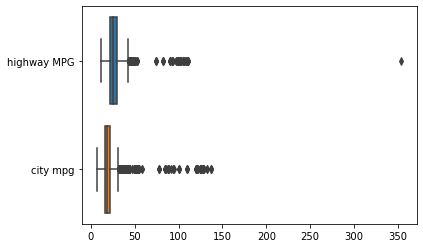

In [46]:
on = sns.boxplot(data = dfnum[["highway MPG","city mpg"]], orient = 'h')
plt.savefig("Saved data/Images/Outliers and histograms/jpg/citympg_highwaympg_outliers.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/citympg_highwaympg_outliers.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/citympg_highwaympg_outliers.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/citympg_highwaympg_outliers.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/citympg_highwaympg_outliers.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/citympg_highwaympg_outliers.txt", "w") as file:
    json.dump(json_data, file)

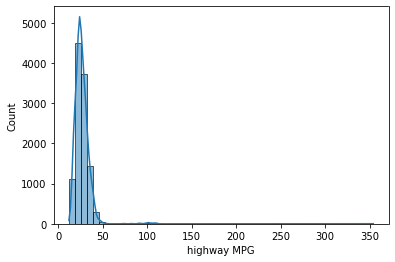

In [47]:
#Distribution of values of Highway MPG and City MPG
on = sns.histplot(data=dfnum["highway MPG"], bins=50, kde= True)
plt.savefig("Saved data/Images/Outliers and histograms/jpg/highwaympg_hist.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/highwaympg_hist.png")

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/highwaympg_hist.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/highwaympg_hist.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/highwaympg_hist.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/highwaympg_hist.txt", "w") as file:
    json.dump(json_data, file)

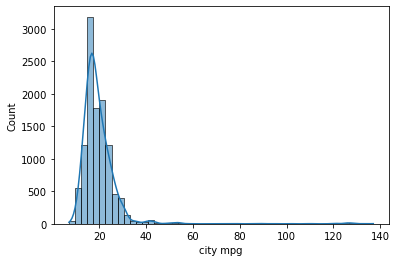

In [48]:
#Distribution of values of Highway MPG and City MPG
on = sns.histplot(data=dfnum["city mpg"], bins=50, kde= True)
plt.savefig("Saved data/Images/Outliers and histograms/jpg/citympg_hist.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/citympg_hist.png")

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/citympg_hist.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/citympg_hist.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/citympg_hist.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/citympg_hist.txt", "w") as file:
    json.dump(json_data, file)

Now we will check the value distribution of MSRP

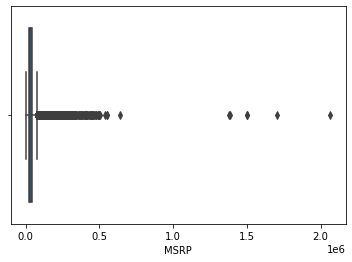

In [49]:
on = sns.boxplot(x=dfnum["MSRP"])
plt.savefig("Saved data/Images/Outliers and histograms/jpg/MSRP_outliers.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/MSRP_outliers.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/MSRP_outliers.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/MSRP_outliers.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/MSRP_outliers.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/MSRP_outliers.txt", "w") as file:
    json.dump(json_data, file)

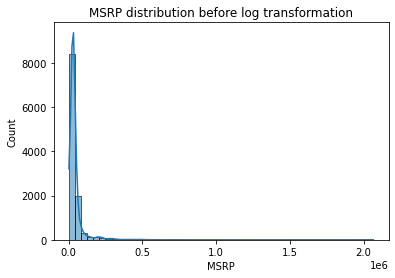

In [50]:
#Distribution of values of MSRP
on = sns.histplot(data=dfnum["MSRP"], bins=50, kde=True)
plt.title("MSRP distribution before log transformation")
plt.savefig("Saved data/Images/Outliers and histograms/jpg/MSRP_hist.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/MSRP_hist.png")
plt.show()


#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/MSRP_hist.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/MSRP_hist.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/MSRP_hist.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/MSRP_hist.txt", "w") as file:
    json.dump(json_data, file)

Skewness is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. The skewness value can be positive, negative, or undefined. In a perfectly symmetrical distribution, the mean, the median, and the mode will all have the same value. However, the variables in our data are not symmetrical, resulting in different values of the central tendency.Skewness does not tell us about the number of outliers. It only tells us the direction.

In [51]:
dataset.select_dtypes(include="number").skew()

Year                -1.260873
Engine HP            1.246412
Engine Cylinders     0.919731
Number of Doors     -1.017108
highway MPG          4.044312
city mpg             7.166323
Popularity           1.625522
MSRP                11.622751
dtype: float64

 We will apply log transformation to MSRP, highway MPG and city MPG inorder to correct their distribution.

In [52]:
#Applying log transformation to MSRP
dataset["MSRP"] = dataset["MSRP"].map(lambda i : np.log(i) if i > 0 else 0)
print(dataset["MSRP"].skew())

-0.9303722700208236


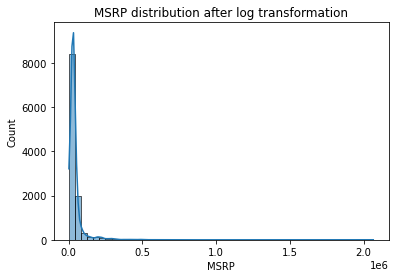

In [53]:
on = sns.histplot(data=dfnum["MSRP"], bins=50, kde=True)
plt.title("MSRP distribution after log transformation")
plt.savefig("Saved data/Images/Outliers and histograms/jpg/MSRP_hist_after_log_transform.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/MSRP_hist_after_log_transform.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/MSRP_hist_after_log_transform.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/MSRP_hist_after_log_transform.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/MSRP_hist_after_log_transform.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/MSRP_hist_after_log_transform.txt", "w") as file:
    json.dump(json_data, file)

In [54]:
#Applying log transformation to highway MPG
dataset["highway MPG"] = dataset["highway MPG"].map(lambda i : np.log(i) if i > 0 else 0)
print(dataset["highway MPG"].skew())


0.7045175140634437


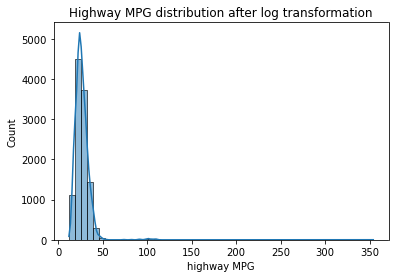

In [55]:
on = sns.histplot(data=dfnum["highway MPG"], bins=50, kde= True)
plt.title("Highway MPG distribution after log transformation")
plt.savefig("Saved data/Images/Outliers and histograms/jpg/highwaympg_hist_after_log_transform.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/highwaympg_hist_after_log_transform.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/highwaympg_hist_after_log_transform.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/highwaympg_hist_after_log_transform.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/highwaympg_hist_after_log_transform.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/highwaympg_hist_after_log_transform.txt", "w") as file:
    json.dump(json_data, file)

In [56]:
#Applying log transformation to CIty MPG
dataset["city mpg"] = dataset["city mpg"].map(lambda i : np.log(i) if i > 0 else 0)
print(dataset["city mpg"].skew())

1.4565759732134784


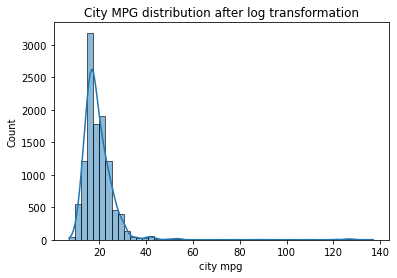

In [57]:
on = sns.histplot(data=dfnum["city mpg"], bins=50, kde= True)
plt.title("City MPG distribution after log transformation")
plt.savefig("Saved data/Images/Outliers and histograms/jpg/citympg_hist_after_log_transform.jpg")
plt.savefig("Saved data/Images/Outliers and histograms/png/citympg_hist_after_log_transform.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Outliers and histograms/citympg_hist_after_log_transform.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Outliers and histograms/citympg_hist_after_log_transform.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Outliers and histograms/jpg/citympg_hist_after_log_transform.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Outliers and histograms/citympg_hist_after_log_transform.txt", "w") as file:
    json.dump(json_data, file)

In [58]:
dataset.skew()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6016\4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


Year               -1.260873
Engine HP           1.246412
Engine Cylinders    0.919731
Number of Doors    -1.017108
highway MPG         0.704518
city mpg            1.456576
Popularity          1.625522
MSRP               -0.930372
dtype: float64

Now we have a distribution more resembling to natural distribution for all these three columns.

# 5. Graphical representation of data to extract information

In [59]:
#Defining a color palett
colors = sns.color_palette('pastel')[0:5]

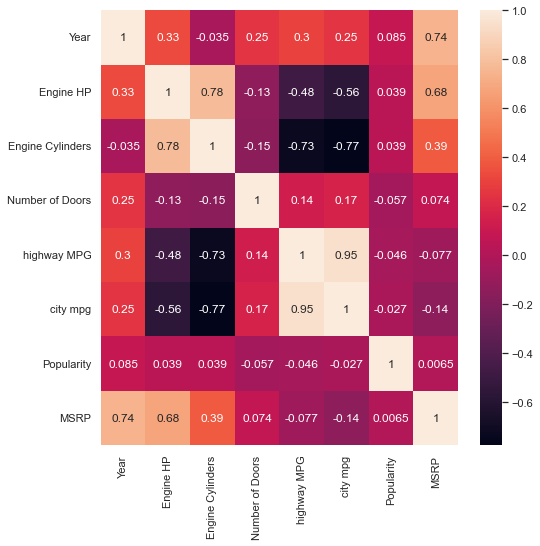

In [60]:
#Heatmap representing the relationship between features
sns.set(rc={'figure.figsize':(8,8)})
on = sns.heatmap(dataset.select_dtypes(include="number").corr(), annot = True)

plt.savefig("Saved data/Images/Relationship Plots/jpg/heatmap.jpg")
plt.savefig("Saved data/Images/Relationship Plots/png/heatmap.png")

plt.show()
#Html view
# mpld3.show(open_browser=False)
#Writing data as json
mpld3.save_json(fig = on.figure,fileobj="Saved data/JSON/Relationship Plots/heatmap.json")

#writing data as html
mpld3.save_html(fig = on.figure,fileobj="Saved data/HTML/Relationship Plots/heatmap.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Relationship Plots/jpg/heatmap.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Relationship Plots/heatmap.txt", "w") as file:
    json.dump(json_data, file)

We can see a liner relationship between,

1. Engine Cylinder and Engine HP (Positive colinear relationship)
2. Highway MPG and Engine Cylinder (negative colinear relationship)
3. City mpg and Engine Cylinder (negative colinear relationship)
4. City mpg and highway MPG (Positive colinear relationship)
5. MSRP and Engine HP (Positive colinear relationship)
6. MSRP and Year (Positive colinear relationship)

The realtionship between MSRP and Year strengthened after cleaning the data. It was not considered as a strong relationship before processing the data. Scatterplot of above relationships are,

### Interactive scatterplot generator

In [61]:
from ipywidgets import interact, interactive
import ipywidgets as widgets


In [62]:
#Dynamic scatterplot generator
categorical_columns = ["Engine Cylinders", "Engine HP", "highway MPG", "city mpg", "MSRP", "Year"]
dd1 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[2],
    description = 'Column 1 (X axis)')

dd2 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[3],
    description = 'Column 2 (Y axis)')

ui = widgets.HBox([dd1, dd2])

def draw_countplot(column_1, column_2):
    p = sns.scatterplot(data=dataset, x = column_1, y = column_2)
    p.set_title(column_1+" vs "+ column_2)
    plt.savefig("Saved data/Images/Relationship Plots/jpg/"+column_1+"_"+column_2+".jpg")
    plt.savefig("Saved data/Images/Relationship Plots/png/"+column_1+"_"+column_2+".png")
    
    #Html view
    # mpld3.show()
    #Writing data as json
    mpld3.save_json(fig = p.figure,fileobj="Saved data/JSON/Relationship Plots/"+column_1+"_"+column_2+".json")

    #writing data as html
    mpld3.save_html(fig = p.figure,fileobj="Saved data/HTML/Relationship Plots/"+column_1+"_"+column_2+".html")

    #Writing image data as byte string
    image = Image.open("Saved data/Images/Relationship Plots/jpg/"+column_1+"_"+column_2+".jpg")
    json_data = image.tobytes().decode("latin1")
    with open("Saved data/bytestring/Relationship Plots/"+column_1+"_"+column_2+".txt", "w") as file:
        json.dump(json_data, file)

out = widgets.interactive_output(draw_countplot, {'column_1':dd1, 'column_2':dd2})
display(ui, out)

Output()

## Bar charts and pie charts

### Engine Fuel Type and count

In [63]:
#Creating new dataframe of engine fuel type and its count
typed = pd.DataFrame(dataset["Engine Fuel Type"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Engine Fuel Type", "Count"]
typed

,Engine Fuel Type,Count
0,regular unleaded,6655
1,premium unleaded (required),1938
2,premium unleaded (recommended),1391
3,flex-fuel (unleaded/E85),887
4,diesel,150
5,electric,61
6,flex-fuel (premium unleaded required/E85),53
7,flex-fuel (premium unleaded recommended/E85),26
8,flex-fuel (unleaded/natural gas),6
9,natural gas,2


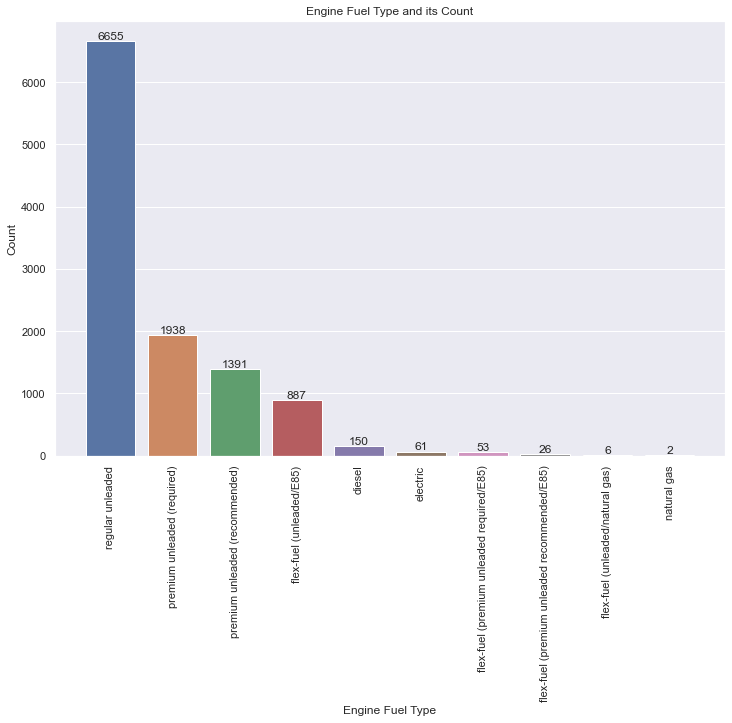

In [64]:
sns.set(rc={'figure.figsize':(12,8)})
chart = sns.barplot(data=typed,x=typed["Engine Fuel Type"],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title("Engine Fuel Type and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Engine_fuel_type_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Engine_fuel_type_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Engine_fuel_type_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Engine_fuel_type_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Engine_fuel_type_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Engine_fuel_type_count.txt", "w") as file:
    json.dump(json_data, file)

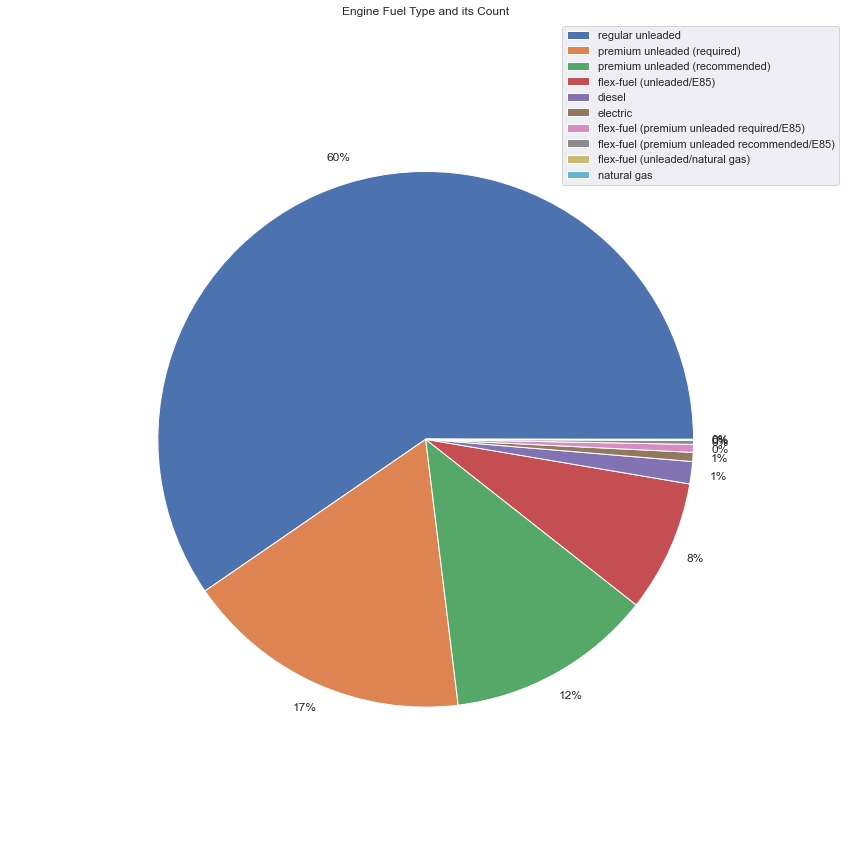

<Figure size 1080x1440 with 0 Axes>

<Figure size 1080x1440 with 0 Axes>

In [65]:
plt.rcParams["figure.figsize"] = (15,20)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Engine Fuel Type"], loc = "upper right")
plt.title("Engine Fuel Type and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Engine_fuel_type_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Engine_fuel_type_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Engine_fuel_type_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Engine_fuel_type_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Engine_fuel_type_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Engine_fuel_type_count.txt", "w") as file:
    json.dump(json_data, file)

### Engine Cylinder and count of vehicles

In [66]:
#Creating new dataframe of engine cylinder and its count
typed = pd.DataFrame(dataset["Engine Cylinders"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Engine Cylinders", "Count"]
typed

,Engine Cylinders,Count
0,4.0,4361
1,6.0,4288
2,8.0,1965
3,12.0,227
4,5.0,169
5,10.0,65
6,0.0,61
7,3.0,30
8,16.0,3


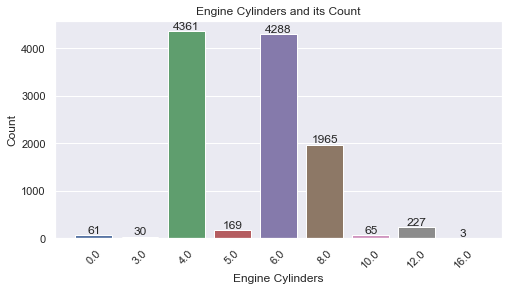

In [67]:
sns.set(rc={'figure.figsize':(8,4)})
chart = sns.barplot(data=typed,x=typed['Engine Cylinders'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.bar_label(chart.containers[0])
chart.set_title("Engine Cylinders and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Engine_cylinders_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Engine_cylinders_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Engine_cylinders_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Engine_cylinders_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Engine_cylinders_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Engine_cylinders_count.txt", "w") as file:
    json.dump(json_data, file)

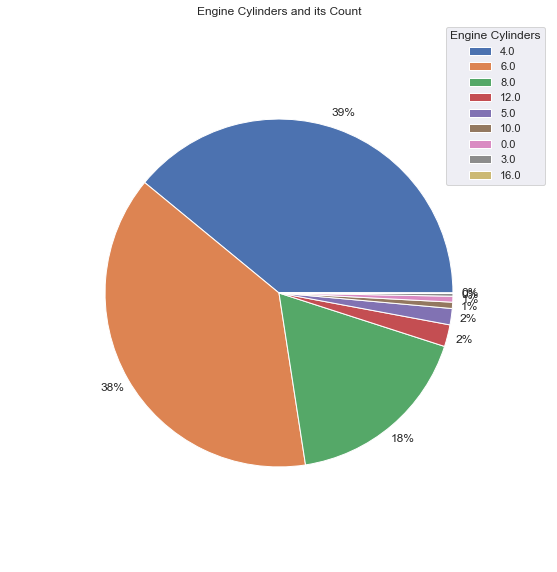

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [68]:
plt.rcParams["figure.figsize"] = (15,10)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Engine Cylinders"], loc = "upper right", title = "Engine Cylinders")
plt.title("Engine Cylinders and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Engine_cylinders_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Engine_cylinders_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(), fileobj="Saved data/JSON/Pie Graph/Engine_cylinders_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Engine_cylinders_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Engine_cylinders_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Engine_cylinders_count.txt", "w") as file:
    json.dump(json_data, file)

### Market Category and count of vehicles

In [69]:
#Creating new dataframe of Market Category and its count
typed = pd.DataFrame(dataset["Market Category"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Market Category", "Count"]
typed

,Market Category,Count
0,Missing,3373
1,Crossover,1075
2,Flex Fuel,855
3,Luxury,818
4,"Luxury,Performance",659
...,...,...
67,"Crossover,Exotic,Luxury,Performance",1
68,"Exotic,Luxury,High-Performance,Hybrid",1
69,"Crossover,Exotic,Luxury,High-Performance",1
70,"Flex Fuel,Factory Tuner,Luxury,High-Performance",1


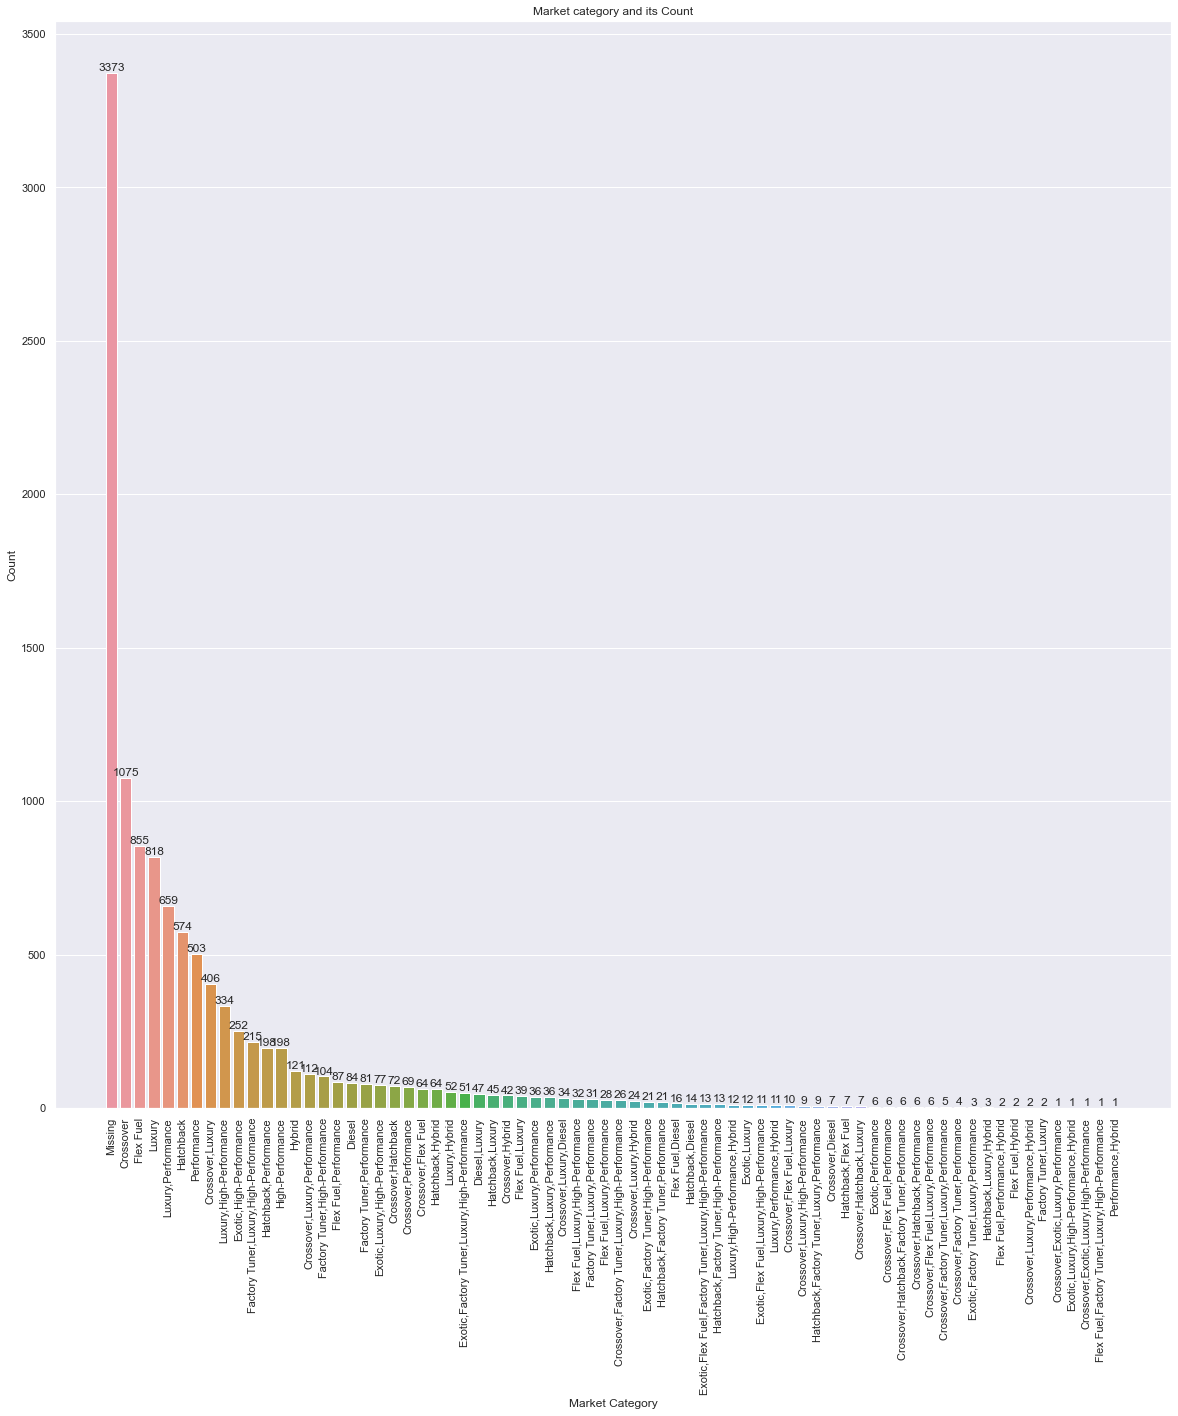

In [70]:
sns.set(rc={'figure.figsize':(20,20)})
chart = sns.barplot(data=typed,x=typed['Market Category'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title("Market category and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Market_category_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Market_category_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Market_category_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Market_category_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Market_category_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Market_category_count.txt", "w") as file:
    json.dump(json_data, file)

### Transmission type and count

In [71]:
#Creating new dataframe of Transmission type and its count
typed = pd.DataFrame(dataset["Transmission Type"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Transmission Type", "Count"]
typed

,Transmission Type,Count
0,AUTOMATIC,7922
1,MANUAL,2621
2,AUTOMATED_MANUAL,551
3,DIRECT_DRIVE,63
4,UNKNOWN,12


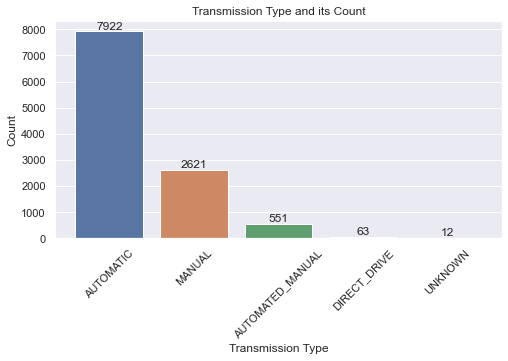

In [72]:
sns.set(rc={'figure.figsize':(8,4)})
chart = sns.barplot(data=typed,x=typed['Transmission Type'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.bar_label(chart.containers[0])
chart.set_title("Transmission Type and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Transmission_type_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Transmission_type_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Transmission_type_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Transmission_type_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Transmission_type_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Transmission_type_count.txt", "w") as file:
    json.dump(json_data, file)

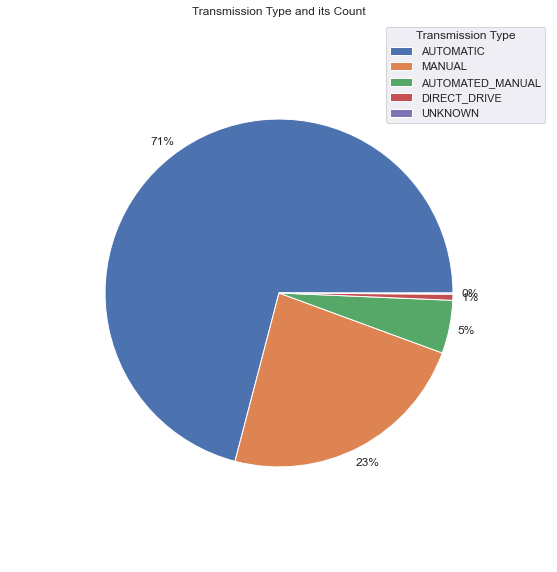

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [73]:
plt.rcParams["figure.figsize"] = (10,10)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Transmission Type"], loc = "upper right", title = "Transmission Type")
plt.title("Transmission Type and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Transmission_type_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Transmission_type_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Transmission_type_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Transmission_type_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Transmission_type_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Transmission_type_count.txt", "w") as file:
    json.dump(json_data, file)

### Type of drive and count

In [74]:
#Creating new dataframe of Type of drive and its count
typed = pd.DataFrame(dataset["Driven_Wheels"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Driven_Wheels", "Count"]
typed

,Driven_Wheels,Count
0,front wheel drive,4350
1,rear wheel drive,3191
2,all wheel drive,2303
3,four wheel drive,1325


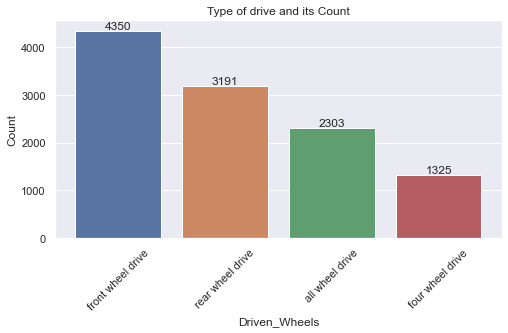

In [75]:
sns.set(rc={'figure.figsize':(8,4)})
chart = sns.barplot(data=typed,x=typed['Driven_Wheels'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.bar_label(chart.containers[0])
chart.set_title("Type of drive and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/driven_wheels_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/driven_wheels_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/driven_wheels_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/driven_wheels_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/driven_wheels_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/driven_wheels_count.txt", "w") as file:
    json.dump(json_data, file)

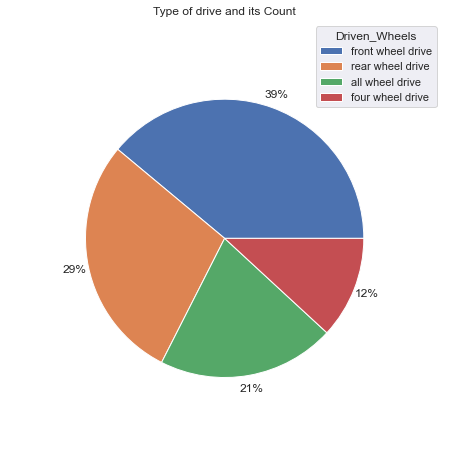

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [76]:
plt.rcParams["figure.figsize"] = (8,8)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Driven_Wheels"], loc = "upper right", title = "Driven_Wheels")
plt.title("Type of drive and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/driven_wheels_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/driven_wheels_countt.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/driven_wheels_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/driven_wheels_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/driven_wheels_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/driven_wheels_count.txt", "w") as file:
    json.dump(json_data, file)

### Vehicle Size and count

In [77]:
#Creating new dataframe of vehicle size and its count
typed = pd.DataFrame(dataset["Vehicle Size"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Vehicle Size", "Count"]
typed

,Vehicle Size,Count
0,Compact,4375
1,Midsize,4117
2,Large,2677


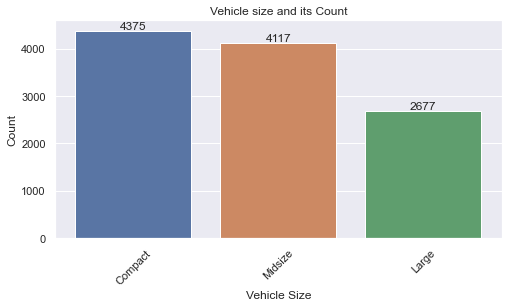

In [78]:
sns.set(rc={'figure.figsize':(8,4)})
chart = sns.barplot(data=typed,x=typed['Vehicle Size'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.bar_label(chart.containers[0])
chart.set_title("Vehicle size and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Vehicle_size_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Vehicle_size_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Vehicle_size_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Vehicle_size_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Vehicle_size_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Vehicle_size_count.txt", "w") as file:
    json.dump(json_data, file)

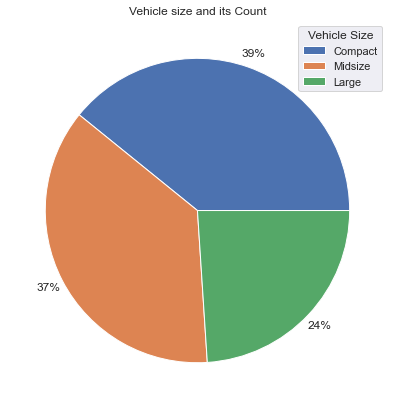

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [79]:
plt.rcParams["figure.figsize"] = (7,7)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=1, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Vehicle Size"], loc = "upper right", title = "Vehicle Size")
plt.title("Vehicle size and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Vehicle_size_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Vehicle_size_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Vehicle_size_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Vehicle_size_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Vehicle_size_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Vehicle_size_count.txt", "w") as file:
    json.dump(json_data, file)

### Vehicle style and count

In [80]:
#Creating new dataframe of Market Category and its count
typed = pd.DataFrame(dataset["Vehicle Style"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Vehicle Style", "Count"]
typed

,Vehicle Style,Count
0,Sedan,2834
1,4dr SUV,2434
2,Coupe,1154
3,Convertible,741
4,4dr Hatchback,663
5,Crew Cab Pickup,655
6,Extended Cab Pickup,597
7,Wagon,562
8,2dr Hatchback,412
9,Passenger Minivan,389


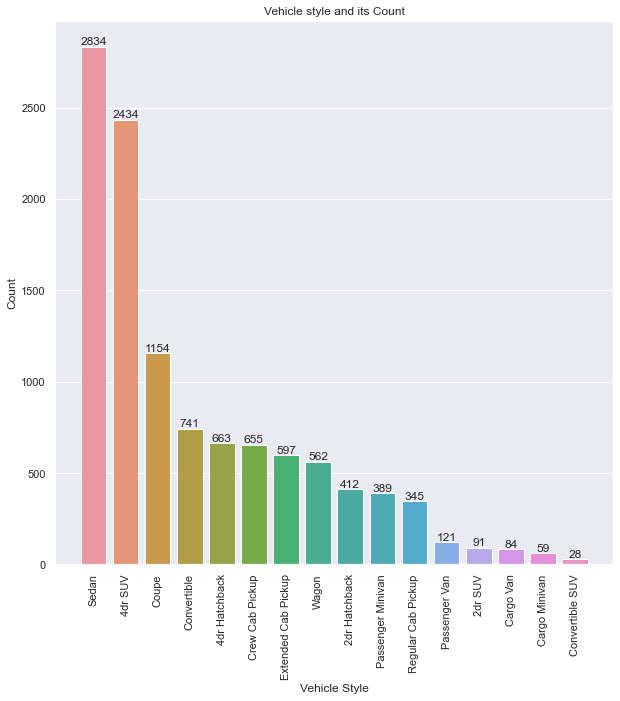

In [81]:
sns.set(rc={'figure.figsize':(10,10)})
chart = sns.barplot(data=typed,x=typed['Vehicle Style'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title("Vehicle style and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Vehicle_style_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Vehicle_style_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Vehicle_style_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Vehicle_style_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Vehicle_style_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Vehicle_style_count.txt", "w") as file:
    json.dump(json_data, file)

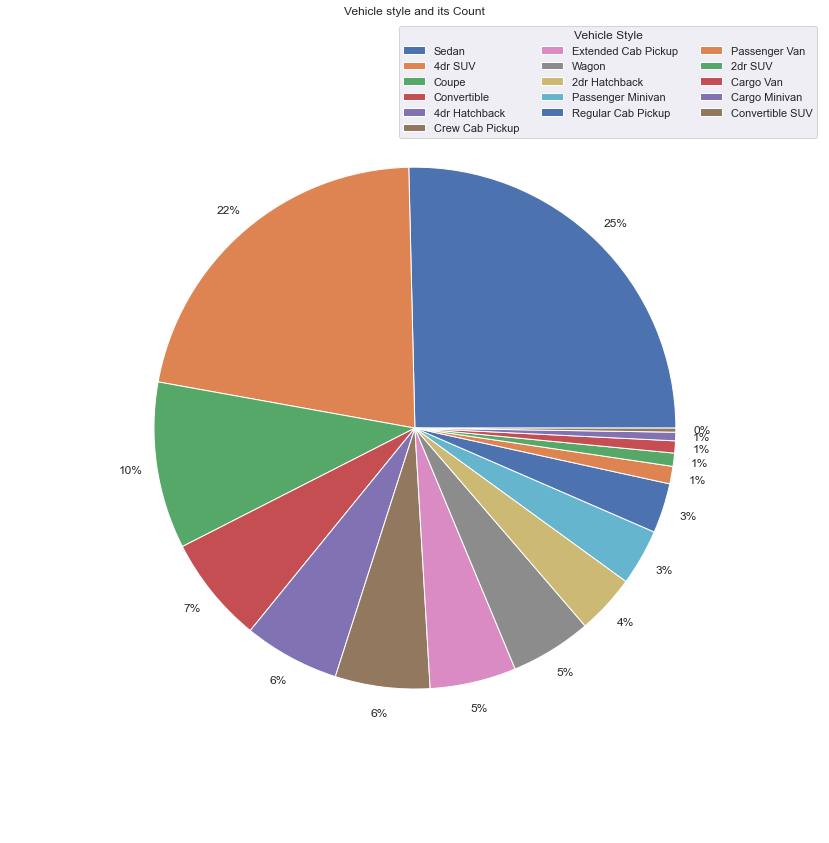

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [82]:
plt.rcParams["figure.figsize"] = (15,15)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Vehicle Style"], loc = "upper right", title = "Vehicle Style", ncol = 3)
plt.title("Vehicle style and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Vehicle_style_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Vehicle_style_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Vehicle_style_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Vehicle_style_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Vehicle_style_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Vehicle_style_count.txt", "w") as file:
    json.dump(json_data, file)

### Vehicle Make and Count

In [83]:
#Creating new dataframe of Vehicle Make and its count
typed = pd.DataFrame(dataset["Make"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Make", "Count"]
typed

,Make,Count
0,Chevrolet,1083
1,Ford,825
2,Toyota,719
3,Volkswagen,568
4,Nissan,551
5,Dodge,529
6,GMC,482
7,Honda,433
8,Cadillac,396
9,Mazda,392


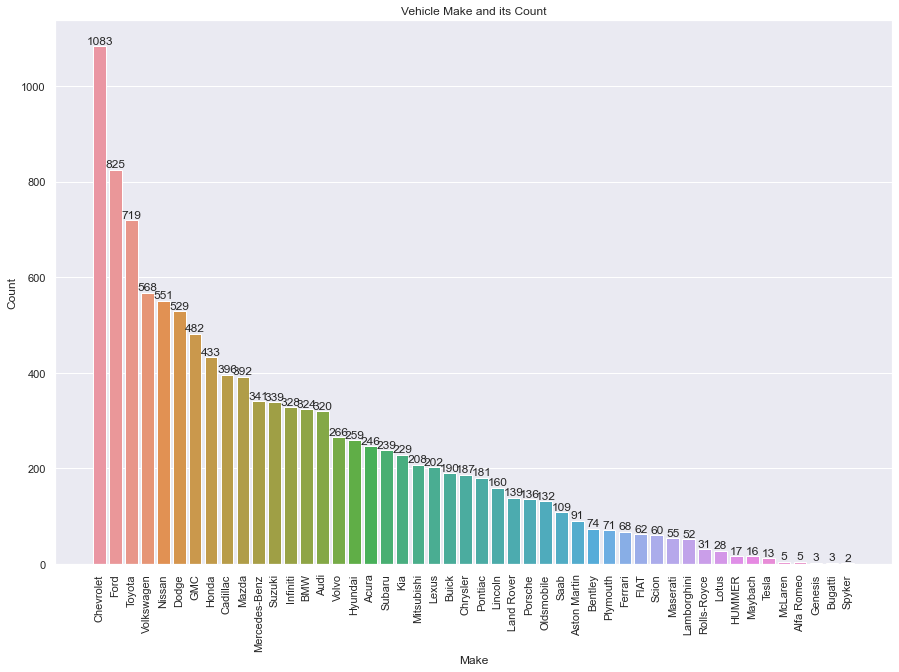

In [84]:
sns.set(rc={'figure.figsize':(15,10)})
chart = sns.barplot(data=typed,x=typed['Make'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title("Vehicle Make and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Vehicle_make_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Vehicle_make_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Vehicle_make_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Vehicle_make_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Vehicle_make_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Vehicle_make_count.txt", "w") as file:
    json.dump(json_data, file)

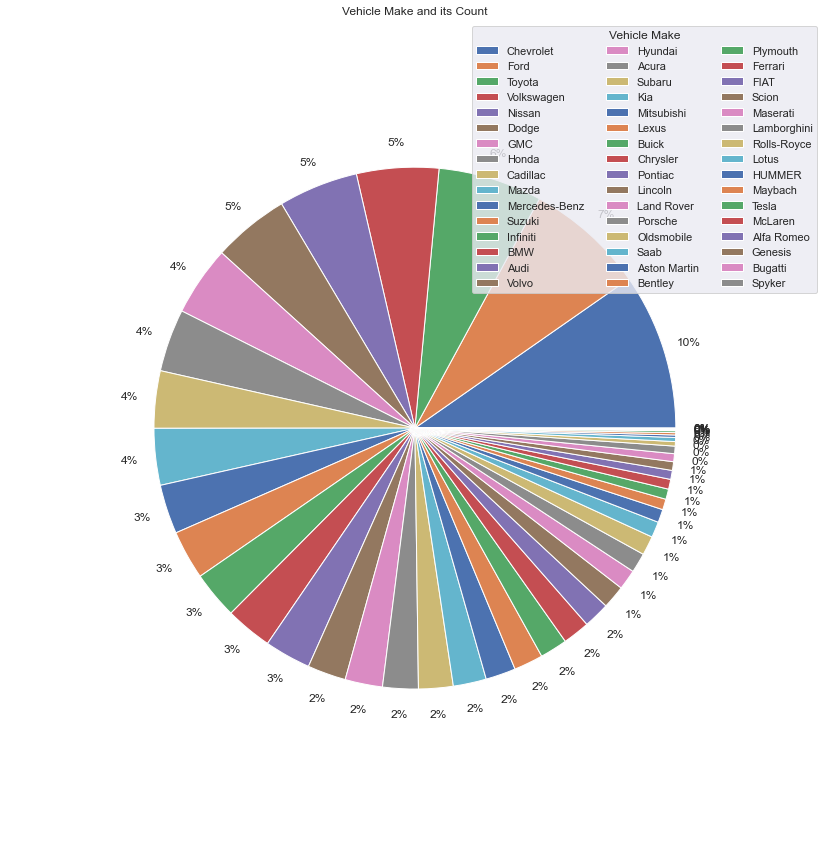

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [85]:
plt.rcParams["figure.figsize"] = (15,15)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Make"], loc = "upper right", title = "Vehicle Make", ncol = 3)
plt.title("Vehicle Make and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Vehicle_make_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Vehicle_make_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Vehicle_make_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Vehicle_make_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Vehicle_make_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Vehicle_make_count.txt", "w") as file:
    json.dump(json_data, file)

### Year and count

In [86]:
#Creating new dataframe of Year and its count
typed = pd.DataFrame(dataset["Year"].value_counts())
typed.reset_index(level=0, inplace=True)
typed.columns = ["Year", "Count"]
typed

,Year,Count
0,2016,2068
1,2015,2065
2,2017,1624
3,2014,554
4,2009,357
5,2012,351
6,2007,334
7,2013,324
8,2008,322
9,2011,279


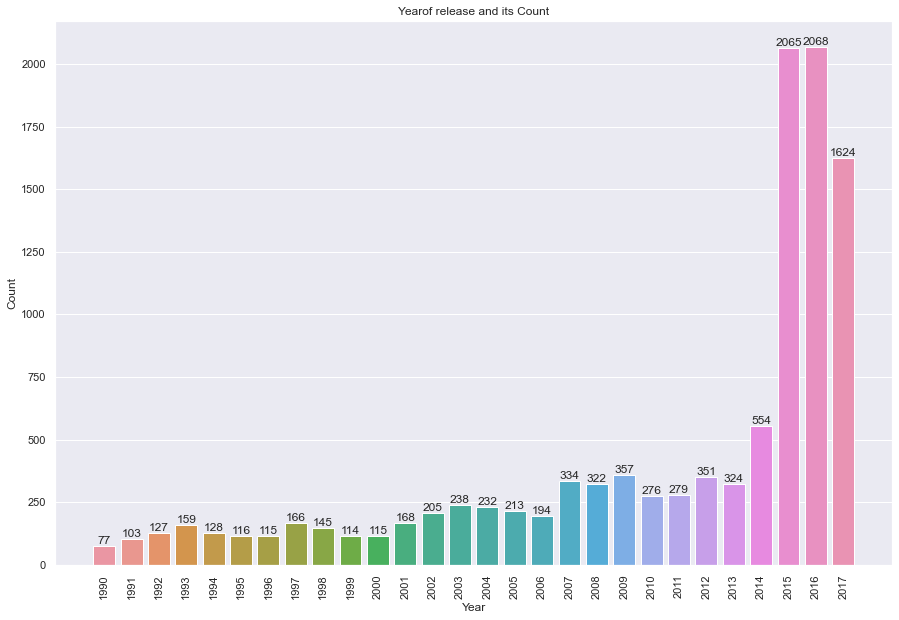

In [87]:
sns.set(rc={'figure.figsize':(15,10)})
chart = sns.barplot(data=typed,x=typed['Year'],y=typed['Count'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title("Yearof release and its Count")
plt.savefig("Saved data/Images/Bar graphs/jpg/Vehicle_year_count.jpg")
plt.savefig("Saved data/Images/Bar graphs/png/Vehicle_year_count.png")
chart.plot()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = chart.figure,fileobj="Saved data/JSON/Bar graphs/Vehicle_year_count.json")

#writing data as html
mpld3.save_html(fig = chart.figure,fileobj="Saved data/HTML/Bar graphs/Vehicle_year_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Bar graphs/jpg/Vehicle_year_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Bar graphs/Vehicle_year_count.txt", "w") as file:
    json.dump(json_data, file)

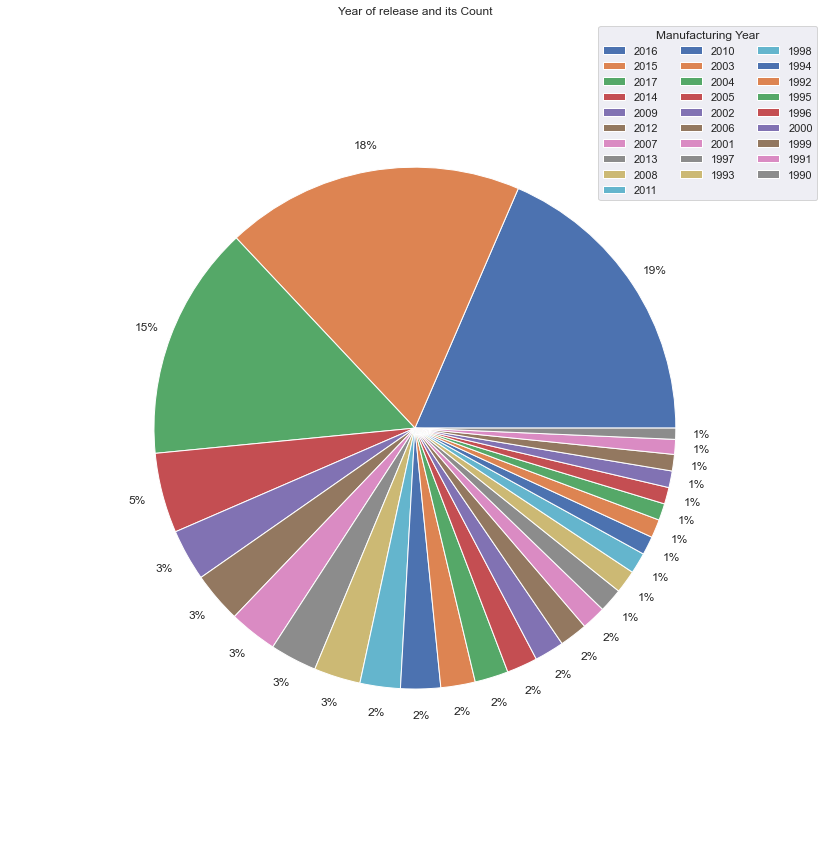

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [88]:
plt.rcParams["figure.figsize"] = (15,15)
chart = plt.pie(typed["Count"], autopct='%.0f%%', radius=.8, pctdistance=1.1, labeldistance=1.7)
plt.legend(typed["Year"], loc = "upper right", title = "Manufacturing Year", ncol = 3)
plt.title("Year of release and its Count")
plt.savefig("Saved data/Images/Pie Graph/jpg/Vehicle_year_count.jpg")
plt.savefig("Saved data/Images/Pie Graph/png/Vehicle_year_count.png")
plt.show()

#Html view
# mpld3.show()
#Writing data as json
mpld3.save_json(fig = plt.figure(),fileobj="Saved data/JSON/Pie Graph/Vehicle_year_count.json")

#writing data as html
mpld3.save_html(fig = plt.figure(),fileobj="Saved data/HTML/Pie Graph/Vehicle_year_count.html")

#Writing image data as byte string
image = Image.open("Saved data/Images/Pie Graph/jpg/Vehicle_year_count.jpg")
json_data = image.tobytes().decode("latin1")
with open("Saved data/bytestring/Pie Graph/Vehicle_year_count.txt", "w") as file:
    json.dump(json_data, file)

## Interactive Charts for more combinations

We will use interactive dashboard to view the following relationships, and their respective count in subcategories
1. Engine Cylinders and Transmission type
2. Transmission type and type of drive
3. Type of drive and Engine Cylinder
4. Engine Cylinders and Engine Fuel type

In [89]:
categorical_columns = dataset.select_dtypes(exclude=["number"]).columns
categorical_columns = categorical_columns.to_list()
categorical_columns.append("Engine Cylinders")
categorical_columns.append("Year")

In [90]:
dd1 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[2],
    description = 'Column')

dd2 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[4],
    description = 'Hue')

ui = widgets.HBox([dd1, dd2])
sns.set(rc={'figure.figsize':(12,10)})
def draw_countplot(column, hue):
    p = sns.countplot(data=dataset, x = column, hue = hue)
    plt.legend(loc='upper right', ncol=2)
    for i in range(len(p.containers)):
        p.bar_label(p.containers[i])
    p.set_title("Count of "+hue+" for "+column)
    if len(dataset[column].unique()) > 4:
        p.tick_params(axis = 'x', rotation = 90)
    plt.savefig("Saved data/Images/Relationship Plots/jpg/"+column+"_"+hue+".jpg")
    plt.savefig("Saved data/Images/Relationship Plots/png/"+column+"_"+hue+".png")
    
    #Html view
    # mpld3.show()
    #Writing data as json
    mpld3.save_json(fig = p.figure,fileobj="Saved data/JSON/Relationship Plots/"+column+"_"+hue+".json")

    #writing data as html
    mpld3.save_html(fig = p.figure,fileobj="Saved data/HTML/Relationship Plots/"+column+"_"+hue+".html")

    #Writing image data as byte string
    image = Image.open("Saved data/Images/Relationship Plots/jpg/"+column+"_"+hue+".jpg")
    json_data = image.tobytes().decode("latin1")
    with open("Saved data/bytestring/Relationship Plots/"+column+"_"+hue+".txt", "w") as file:
        json.dump(json_data, file)

out = widgets.interactive_output(draw_countplot, {'column':dd1, 'hue':dd2})
display(ui, out)

Output()

### Interactive relationship plot generator

Let's create a relationship plot between features.

In [91]:
#Dynamic relationplot generator
categorical_columns = dataset.columns
dd1 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[5],
    description = 'Column 1 (X axis)')

dd2 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[4],
    description = 'Column 2 (Y axis)')

dd3 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[3],
    description = 'Hue')

dd4 = widgets.Dropdown(
    options = categorical_columns,
    value = categorical_columns[15],
    description = 'Size')

ui = widgets.HBox([dd1, dd2, dd3, dd4])
sns.reset_defaults()
def draw_countplot(column_1, column_2, hue, size):
    p = sns.relplot(data=dataset, x = column_1, y = column_2, hue=hue, size=size, alpha=.5, palette="muted")
    plt.savefig("Saved data/Images/Relationship Plots/jpg/"+column_1+"_"+column_2+"_"+hue+"_"+size+".jpg")
    plt.savefig("Saved data/Images/Relationship Plots/png/"+column_1+"_"+column_2+"_"+hue+"_"+size+".png")

    #Html view
    # mpld3.show()
    #Writing data as json
    mpld3.save_json(fig = p.figure,fileobj="Saved data/JSON/Relationship Plots/"+column_1+"_"+column_2+"_"+hue+"_"+size+".json")

    #writing data as html
    mpld3.save_html(fig = p.figure,fileobj="Saved data/HTML/Relationship Plots/"+column_1+"_"+column_2+"_"+hue+"_"+size+".html")

    #Writing image data as byte string
    image = Image.open("Saved data/Images/Relationship Plots/jpg/"+column_1+"_"+column_2+"_"+hue+"_"+size+".jpg")
    json_data = image.tobytes().decode("latin1")
    with open("Saved data/bytestring/Relationship Plots/"+column_1+"_"+column_2+"_"+hue+"_"+size+".txt", "w") as file:
        json.dump(json_data, file)

out = widgets.interactive_output(draw_countplot, {'column_1':dd1, 'column_2':dd2, 'hue':dd3, 'size': dd4})
display(ui, out)

Output()

### Writing about data set to HTML file

In [94]:
from pandas_profiling import ProfileReport
#Creating pandas profile
profile = ProfileReport(dataset, title="Pandas Profiling Report")
#Exporting Created Profile to HTML format
profile.to_file("Saved data/Pandas_Profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]